In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data #

In [3]:
test = pd.read_csv('./test.csv')
train = pd.read_csv('./train.csv')

In [4]:
train.shape

(101763, 23)

In [5]:
test.shape

(67842, 22)

In [6]:
train.columns

Index(['id', 'loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e',
       'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment',
       'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount',
       'defects'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [8]:
train

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,...,7,0,1,0,11.0,8.0,16.0,12.0,3.0,False
101759,101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,...,23,0,2,0,18.0,20.0,67.0,40.0,9.0,False
101760,101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,...,20,0,4,0,10.0,8.0,51.0,28.0,1.0,False
101761,101761,10.0,2.0,1.0,2.0,43.0,191.76,0.15,6.46,29.53,...,7,0,1,0,11.0,14.0,24.0,19.0,3.0,False


# Train Test Split #

In [9]:
y = train.defects
X = train.drop(['defects', 'id'], axis=1)
X_test = test.drop('id', axis=1)

In [10]:
y= y.map({True: 1, False:0})

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing Data #

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# Creating Model NN #

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

2023-10-06 22:33:56.978838: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
model = Sequential()

model.add(Dense(21, activation='relu', input_shape=[21],kernel_regularizer=regularizers.L1L2(l1=0.01, l2=0.01)))
model.add(BatchNormalization(synchronized=True))
model.add(Dropout(0.2))
model.add(Dense(11,activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(11,activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=0)

In [17]:
model.fit(X_train_scaled, y_train,
         verbose=1,
         batch_size=32,
         epochs=100,
         validation_data=[X_val_scaled, y_val],
         callbacks=[early_stop]
         )

Epoch 1/100
2545/2545 [==============================] - 10s 3ms/step - loss: 1.3648 - accuracy: 0.6778 - val_loss: 0.9471 - val_accuracy: 0.7949
Epoch 2/100
2545/2545 [==============================] - 6s 2ms/step - loss: 0.8190 - accuracy: 0.7818 - val_loss: 0.6540 - val_accuracy: 0.8013
Epoch 3/100
2545/2545 [==============================] - 6s 2ms/step - loss: 0.6124 - accuracy: 0.7967 - val_loss: 0.5326 - val_accuracy: 0.8031
Epoch 4/100
2545/2545 [==============================] - 7s 3ms/step - loss: 0.5243 - accuracy: 0.8017 - val_loss: 0.4841 - val_accuracy: 0.8066
Epoch 5/100
2545/2545 [==============================] - 10s 4ms/step - loss: 0.4875 - accuracy: 0.8060 - val_loss: 0.4584 - val_accuracy: 0.8130
Epoch 6/100
2545/2545 [==============================] - 13s 5ms/step - loss: 0.4688 - accuracy: 0.8079 - val_loss: 0.4493 - val_accuracy: 0.8122
Epoch 7/100
2545/2545 [==============================] - 8s 3ms/step - loss: 0.4613 - accuracy: 0.8083 - val_loss: 0.4433 - val

<AxesSubplot:>

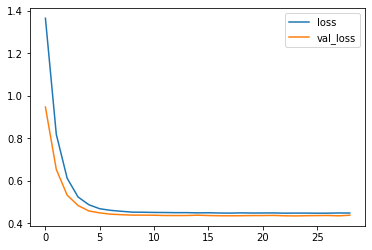

In [18]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

In [19]:
prob_pred = model.predict(X_val_scaled)

637/637 [==============================] - 1s 2ms/step


In [20]:
predictions = (model.predict(X_val_scaled) > 0.5).astype('int32')

637/637 [==============================] - 1s 1ms/step


In [21]:
from sklearn.metrics import roc_curve, confusion_matrix, classification_report, ConfusionMatrixDisplay

fpr, tpr, thresholds = roc_curve(y_true=y_val, y_score=predictions)

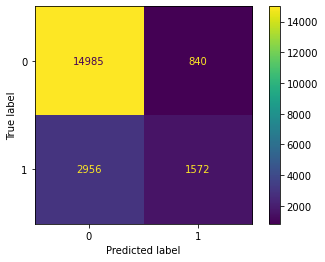

In [22]:
matrix =confusion_matrix(y_pred=predictions, y_true=y_val)
disp = ConfusionMatrixDisplay(matrix)
disp.plot()
plt.show()

In [23]:
print(classification_report(y_true=y_val, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     15825
           1       0.65      0.35      0.45      4528

    accuracy                           0.81     20353
   macro avg       0.74      0.65      0.67     20353
weighted avg       0.79      0.81      0.79     20353



In [24]:
fpr

array([0.        , 0.05308057, 1.        ])

In [25]:
tpr

array([0.        , 0.34717314, 1.        ])

In [26]:
thresholds

array([inf,  1.,  0.])

In [27]:
prob_pred = model.predict(X_test_scaled)

2121/2121 [==============================] - 3s 1ms/step


In [28]:
submission = pd.DataFrame(index=test.id, data=prob_pred, columns=['defects'])

In [29]:
submission.to_csv('submission.csv')

# Model XGB #

In [30]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

XBGmodel = XGBClassifier()

In [31]:
param_grid={'n_estimators':[10,100,150],
           'n_jobs':[2,4],
           'learning_rate':[0.3,1.0]}

In [32]:
#grid_model_XBG = GridSearchCV(estimator=XBGmodel,
#                          param_grid=param_grid,
#                         scoring='neg_mean_squared_error',
#                         cv=5,
#                         verbose=1)

In [33]:
#grid_model_XBG.fit(X_train_scaled, y_train)

In [34]:
#grid_model_XBG.best_params_

In [35]:
XBGmodel=XGBClassifier(n_estimators=10, learning_rate=0.3, n_jobs=2)
XBGmodel.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=2, num_parallel_tree=None, predictor=None,
              random_state=None, ...)

In [36]:
prediction_XBG = XBGmodel.predict(X_val_scaled)

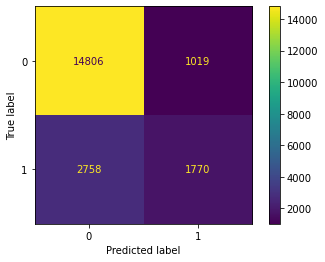

In [37]:
matrix = confusion_matrix(y_true=y_val, y_pred=prediction_XBG )
dis = ConfusionMatrixDisplay(matrix)
dis.plot()
plt.show()

In [38]:
print(classification_report(y_true=y_val, y_pred=prediction_XBG))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     15825
           1       0.63      0.39      0.48      4528

    accuracy                           0.81     20353
   macro avg       0.74      0.66      0.69     20353
weighted avg       0.80      0.81      0.80     20353



In [40]:
final_XBGmodel=XGBClassifier(n_estimators=10, learning_rate=0.3, n_jobs=2)
final_XBGmodel.fit(X_scaled, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=2, num_parallel_tree=None, predictor=None,
              random_state=None, ...)

In [41]:
prediction_XBG_result = final_XBGmodel.predict(X_test_scaled)

In [42]:
submission_XBG = pd.DataFrame(index=test.id, data=prediction_XBG_result, columns=['defects'])

In [43]:
#submission_XBG.to_csv('submission.csv')